In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import datetime as dt
from patsy import dmatrix

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes(palette="muted")

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from taxi_pakage import *

C:\Users\ledes\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
result_sets = pd.DataFrame(columns = ["R square", "AIC", "BIC", "P_fstatics", "P_omnibus", "P_jb", "Cond_no", "changed"])

In [3]:

def storage(result, change) :
    """
    회귀분석 결과 모음 
    
    전역변수로 아래 데이터 프레임 선언
    result_sets = pd.DataFrame(columns = ["R square", "AIC", "BIC", "P_fstatics", "P_omnibus", "P_jb", "Cond_no", "changed"])

    Variables_name.fit() 상태로 삽입
    ex)result = model.fit() 이면
    result를 삽입    
    
    
    change = 이전 데이터 셋에서 무엇을 변화시켰는지 적을 것.
    """    
    

    summary = result.summary()
    
    t1 = summary.tables[0]
    t2 = summary.tables[1]
    t3 = summary.tables[2]

    r_squared = float(t1.data[0][3])
    p_fstatics = float(t1.data[3][3])
    
    p_omnibus = float(t3.data[1][1])
    p_jb = float(t3.data[2][3])
    con = float(t3.data[3][3])
    
    put = {
        "R square" : r_squared,
        "AIC" : result.aic,
        "BIC" : result.bic,
        "P_fstatics" : p_fstatics,
        "P_omnibus" : p_omnibus,
        "P_jb" : p_jb,
        "Cond_no" : con, 
        "changed" : change,
    }
    
    result_sets.loc[len(result_sets)] = put



In [4]:
def total_features() :
    return int(result.summary().tables[0].data[7][1])

In [5]:
taxi = pd.read_csv('edited_taxi.csv')

In [6]:
#id, pick date 제거 후 처음 부터 다시
#test_0(index = 0)
features = 'dist + passenger_count + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + pick_time + drop_time + holiday + holiday_Fri + weekday'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "id, pick date 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1250.
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:04:14   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458632   BIC:                         2.911e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.031e+05   8328.997     12.376      0.000    8.68e+04    1.19e+05
dist                 112.3244      1.044    107.548      0.000     110.277     114.371
passenger_count       30.1170      3.287      9.163      0.000      23.675      36.559
pickup_latitude    -1379.9365    153.697     -8.978      0.000   -1681.176   -1078.696
dropoff_longitude    298.0399     62.598      4.761      0.000     175.350     420.730
dropoff_latitude    -597.9113    139.009     -4.301      0.000    -870.365    -325.458
store_and_fwd_flag   -51.7281     58.318     -0.887      0.375    -166.028      62.572
pick_time             -0.0047      0.001     -9.078      0.000      -0.006      -0.004
drop_time              0.0061      0.001     12.007      0.000       0.005       0.007
holiday             -115.7392     14.633     -7.909      0.000    -144.419     -87.059
holiday_Fri          -28.5148     16.099     -1.771      0.077     -60.069       3.040
weekday               22.5121      4.043      5.569      0.000      14.589      30.436
================================================================================
Omnibus:                  8313472.986   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2321005245710774.500
Skew:                         347.549   Prob(JB):                           0.00
Kurtosis:                  195421.772   Cond. No.                       1.52e+08
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.009,2.910824e+07,2.910838e+07,0.0,0.0,0.0,152000000.0,"id, pick date 제거"


In [8]:
#outlier 1차 제거
taxi = erase_outlier_np(result = result, data = taxi, total_feature = 9 + 1)

In [9]:
#outlier 1차 제거 
#test_1(index = 1)
features = 'dist + passenger_count + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + pick_time + drop_time + holiday + holiday_Fri + weekday'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "outlier 1차 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 2.067e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:04:17   Log-Likelihood:            -1.0830e+07
No. Observations:             1456324   AIC:                         2.166e+07
Df Residuals:                 1456312   BIC:                         2.166e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -5.99e+04   1067.580    -56.110      0.000    -6.2e+04   -5.78e+04
dist                 133.3453      0.100   1333.659      0.000     133.149     133.541
passenger_count        4.0180      0.259     15.499      0.000       3.510       4.526
pickup_latitude     1029.6259     14.046     73.304      0.000    1002.096    1057.156
dropoff_longitude  -1010.9210     10.367    -97.516      0.000   -1031.239    -990.602
dropoff_latitude   -1386.9871     11.795   -117.587      0.000   -1410.106   -1363.868
store_and_fwd_flag    28.4617      4.605      6.181      0.000      19.436      37.487
pick_time             -0.0017   4.09e-05    -40.706      0.000      -0.002      -0.002
drop_time              0.0028   4.04e-05     70.009      0.000       0.003       0.003
holiday             -138.9634      1.154   -120.455      0.000    -141.224    -136.702
holiday_Fri          -33.1663      1.269    -26.133      0.000     -35.654     -30.679
weekday               18.3103      0.319     57.459      0.000      17.686      18.935
==============================================================================
Omnibus:                   781239.664   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21720478.335
Skew:                           2.043   Prob(JB):                         0.00
Kurtosis:                      21.473   Cond. No.                     2.47e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
taxi = erase_outlier_np(result = result, data = taxi, total_feature = 9 + 1)

In [11]:
#outlier 2차 제거 
#test_2(index = 2)
features = 'dist + passenger_count + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + pick_time + drop_time + holiday + holiday_Fri + weekday'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "outlier 2차 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 2.477e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:04:19   Log-Likelihood:            -9.7288e+06
No. Observations:             1371528   AIC:                         1.946e+07
Df Residuals:                 1371516   BIC:                         1.946e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.012e+05    946.909   -106.920      0.000   -1.03e+05   -9.94e+04
dist                 147.4773      0.096   1532.348      0.000     147.289     147.666
passenger_count       -0.4725      0.191     -2.471      0.013      -0.847      -0.098
pickup_latitude      987.4088     11.774     83.861      0.000     964.331    1010.486
dropoff_longitude  -1518.0963      9.662   -157.121      0.000   -1537.033   -1499.159
dropoff_latitude   -1251.9546     10.514   -119.070      0.000   -1272.563   -1231.347
store_and_fwd_flag     9.1830      5.010      1.833      0.067      -0.637      19.003
pick_time             -0.0034   3.98e-05    -84.495      0.000      -0.003      -0.003
drop_time              0.0044   3.95e-05    110.650      0.000       0.004       0.004
holiday             -103.0035      0.848   -121.413      0.000    -104.666    -101.341
holiday_Fri          -41.7855      0.934    -44.744      0.000     -43.616     -39.955
weekday               14.6004      0.234     62.342      0.000      14.141      15.059
==============================================================================
Omnibus:                   206187.429   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           357446.585
Skew:                           0.992   Prob(JB):                         0.00
Kurtosis:                       4.524   Cond. No.                     3.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.009,2.910824e+07,2.910838e+07,0.0,0.0,0.0,152000000.0,"id, pick date 제거"
1,0.610,2.166025e+07,2.166039e+07,0.0,0.0,0.0,247000000.0,outlier 1차 제거
2,0.665,1.945760e+07,1.945774e+07,0.0,0.0,0.0,300000000.0,outlier 2차 제거


- OLS regression 1과 달라진 점 : 상수항을 포함
- 상수항이 없었을 경우 outlier 1차 제거시 0.6까지 올라감
- 상수항이 있을 경우 큰 차이 없음
- 변수를 제거해보자 -> anova_lm, VIF를 통한 다중공선성 확인

In [13]:
#2-1.anova_lm
sm.stats.anova_lm(result, tpy = 2)

C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
dist,1.0,2.221863e+11,2.221863e+11,2.617851e+06,0.000000e+00
passenger_count,1.0,3.166597e+06,3.166597e+06,3.730958e+01,1.008152e-09
pickup_latitude,1.0,8.081385e+03,8.081385e+03,9.521675e-02,7.576471e-01
dropoff_longitude,1.0,3.369609e+09,3.369609e+09,3.970151e+04,0.000000e+00
dropoff_latitude,1.0,1.159117e+09,1.159117e+09,1.365699e+04,0.000000e+00
store_and_fwd_flag,1.0,1.143367e+05,1.143367e+05,1.347142e+00,2.457787e-01
pick_time,1.0,7.725745e+08,7.725745e+08,9.102652e+03,0.000000e+00
drop_time,1.0,1.054838e+09,1.054838e+09,1.242835e+04,0.000000e+00
holiday,1.0,2.417320e+09,2.417320e+09,2.848142e+04,0.000000e+00
holiday_Fri,1.0,6.944626e+06,6.944626e+06,8.182319e+01,1.490081e-19


- F 값이 클수록, F 검정의 p value가 낮을수록 영향력이 쎈 변수
- 변수 제외 후보군 : pickup_latitdue, store_and_fwd_flag, holiday_Fri

In [14]:
x = taxi.iloc[ : , 2 : 14] 
y = taxi["trip_duration"]

In [15]:
#2-2.VIF
x.corr()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,holiday,holiday_Fri
passenger_count,1.000000,-0.001294,-0.002314,-0.003855,-0.000547,-0.015049,0.002564,-0.003733,0.009755,0.009358,0.030670,0.026962
pickup_longitude,-0.001294,1.000000,0.102335,0.378661,0.100051,0.005788,0.397289,0.005524,0.014811,0.019326,-0.017517,-0.019992
pickup_latitude,-0.002314,0.102335,1.000000,0.109767,0.537358,-0.004044,-0.205788,-0.004430,0.021079,0.022838,-0.047830,-0.041049
dropoff_longitude,-0.003855,0.378661,0.109767,1.000000,0.264285,0.006294,0.329411,0.006502,-0.048900,-0.047670,-0.001559,-0.002495
dropoff_latitude,-0.000547,0.100051,0.537358,0.264285,1.000000,-0.004730,-0.098751,-0.001275,0.015406,0.015928,-0.029536,-0.026168
store_and_fwd_flag,-0.015049,0.005788,-0.004044,0.006294,-0.004730,1.000000,0.010505,-0.000334,0.001096,0.000859,0.003113,0.002818
dist,0.002564,0.397289,-0.205788,0.329411,-0.098751,0.010505,1.000000,0.013617,-0.020155,-0.014096,0.029588,0.017495
pick_date,-0.003733,0.005524,-0.004430,0.006502,-0.001275,-0.000334,0.013617,1.000000,-0.004060,-0.003866,-0.051036,-0.041850
pick_time,0.009755,0.014811,0.021079,-0.048900,0.015406,0.001096,-0.020155,-0.004060,1.000000,0.962245,-0.095024,-0.082896
drop_time,0.009358,0.019326,0.022838,-0.047670,0.015928,0.000859,-0.014096,-0.003866,0.962245,1.000000,-0.093272,-0.083120


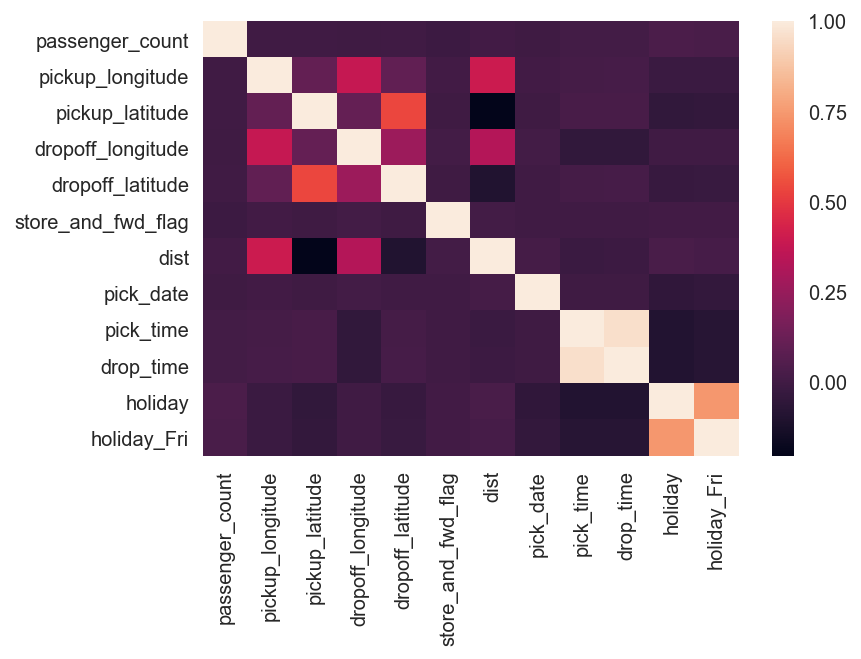

In [16]:
sns.heatmap(x.corr())
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,2.615820e+00,passenger_count
1,5.672259e+06,pickup_longitude
2,3.384647e+06,pickup_latitude
3,5.579248e+06,dropoff_longitude
4,2.647870e+06,dropoff_latitude
5,1.002841e+00,store_and_fwd_flag
6,2.079410e+00,dist
7,4.095080e+00,pick_date
8,7.945071e+01,pick_time
9,7.916224e+01,drop_time


- 다른 계수에 의존적이라고 판단되어지는 위도, 경도 데이터 모두 제거
- 우선적으로 위도, 경도 모두 제거하고 이후에 stor_and_fwd_flag 및 holiday_Fri 제거할지 보자

In [18]:
#위도 및 경도 모두 제거 
#test_3(index = 3)
features = 'dist + passenger_count + store_and_fwd_flag + pick_time + drop_time + holiday + holiday_Fri + weekday'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "위도 및 경도 모두 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 3.219e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:04:39   Log-Likelihood:            -9.7543e+06
No. Observations:             1371528   AIC:                         1.951e+07
Df Residuals:                 1371519   BIC:                         1.951e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            288.0857      0.883    326.360      0.000     286.356     289.816
dist                 141.8585      0.089   1590.849      0.000     141.684     142.033
passenger_count       -0.3696      0.195     -1.898      0.058      -0.751       0.012
store_and_fwd_flag     8.4141      5.104      1.648      0.099      -1.590      18.418
pick_time             -0.0034   4.06e-05    -82.874      0.000      -0.003      -0.003
drop_time              0.0045   4.02e-05    110.616      0.000       0.004       0.005
holiday             -102.0311      0.864   -118.066      0.000    -103.725    -100.337
holiday_Fri          -42.0491      0.951    -44.195      0.000     -43.914     -40.184
weekday               14.7619      0.239     61.871      0.000      14.294      15.230
==============================================================================
Omnibus:                   196438.210   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331070.026
Skew:                           0.964   Prob(JB):                         0.00
Kurtosis:                       4.440   Cond. No.                     1.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.009,2.910824e+07,2.910838e+07,0.0,0.0,0.0,152000000.0,"id, pick date 제거"
1,0.610,2.166025e+07,2.166039e+07,0.0,0.0,0.0,247000000.0,outlier 1차 제거
2,0.665,1.945760e+07,1.945774e+07,0.0,0.0,0.0,300000000.0,outlier 2차 제거
3,0.653,1.950869e+07,1.950880e+07,0.0,0.0,0.0,1590000.0,위도 및 경도 모두 제거


- R sqaure 에 큰 차이없음, 조건수 감소

In [20]:
#3-1.anova_lm
sm.stats.anova_lm(result, tpy = 2)

C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
dist,1.0,2.221863e+11,2.221863e+11,2.522119e+06,0.000000e+00
passenger_count,1.0,3.166597e+06,3.166597e+06,3.594522e+01,2.029945e-09
store_and_fwd_flag,1.0,8.116690e+04,8.116690e+04,9.213556e-01,3.371195e-01
pick_time,1.0,8.983147e+08,8.983147e+08,1.019710e+04,0.000000e+00
drop_time,1.0,1.094907e+09,1.094907e+09,1.242870e+04,0.000000e+00
holiday,1.0,2.354538e+09,2.354538e+09,2.672723e+04,0.000000e+00
holiday_Fri,1.0,6.685132e+06,6.685132e+06,7.588540e+01,3.009379e-18
weekday,1.0,3.372278e+08,3.372278e+08,3.827997e+03,0.000000e+00
Residual,1371519.0,1.208241e+11,8.809509e+04,NaN,NaN


store_and_fwd_flag 삭제

In [21]:
#store_and_fwd_flag 제거 
#test_4(index = 4)
features = 'dist + passenger_count + pick_time + drop_time + holiday + holiday_Fri + weekday'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "store_and_fwd_flag 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 3.679e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:04:41   Log-Likelihood:            -9.7543e+06
No. Observations:             1371528   AIC:                         1.951e+07
Df Residuals:                 1371520   BIC:                         1.951e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         288.1090      0.883    326.429      0.000     286.379     289.839
dist              141.8600      0.089   1590.953      0.000     141.685     142.035
passenger_count    -0.3745      0.195     -1.923      0.055      -0.756       0.007
pick_time          -0.0034   4.06e-05    -82.872      0.000      -0.003      -0.003
drop_time           0.0045   4.02e-05    110.615      0.000       0.004       0.005
holiday          -102.0277      0.864   -118.063      0.000    -103.721    -100.334
holiday_Fri       -42.0454      0.951    -44.192      0.000     -43.910     -40.181
weekday            14.7608      0.239     61.867      0.000      14.293      15.228
==============================================================================
Omnibus:                   196383.083   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           330943.003
Skew:                           0.964   Prob(JB):                         0.00
Kurtosis:                       4.440   Cond. No.                     3.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#여태 지운 독립변수들 feature data에서도 제거
features = 'dist + passenger_count + pick_time + drop_time + holiday + holiday_Fri + weekday'
features += " + trip_duration" 
ls = [i for i in taxi.columns if i in features]
ls = ls[1 : ]
for i in taxi.columns :
    if i not in ls :
        del taxi[i]

In [23]:
#4-1.anova_lm
sm.stats.anova_lm(result, tpy = 2)

C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
dist,1.0,2.221863e+11,2.221863e+11,2.522116e+06,0.000000e+00
passenger_count,1.0,3.166597e+06,3.166597e+06,3.594517e+01,2.029992e-09
pick_time,1.0,8.983377e+08,8.983377e+08,1.019735e+04,0.000000e+00
drop_time,1.0,1.094891e+09,1.094891e+09,1.242850e+04,0.000000e+00
holiday,1.0,2.354420e+09,2.354420e+09,2.672586e+04,0.000000e+00
holiday_Fri,1.0,6.682982e+06,6.682982e+06,7.586090e+01,3.046947e-18
weekday,1.0,3.371820e+08,3.371820e+08,3.827473e+03,0.000000e+00
Residual,1371520.0,1.208243e+11,8.809520e+04,NaN,NaN


In [24]:
x = taxi.iloc[ : ,0 : 6]
y = taxi.trip_duration

In [25]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,2.218857,passenger_count
1,1.813396,dist
2,78.401443,pick_time
3,78.482250,drop_time
4,3.244322,holiday
5,3.883500,holiday_Fri


In [26]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.009,2.910824e+07,2.910838e+07,0.0,0.0,0.0,152000000.0,"id, pick date 제거"
1,0.610,2.166025e+07,2.166039e+07,0.0,0.0,0.0,247000000.0,outlier 1차 제거
2,0.665,1.945760e+07,1.945774e+07,0.0,0.0,0.0,300000000.0,outlier 2차 제거
3,0.653,1.950869e+07,1.950880e+07,0.0,0.0,0.0,1590000.0,위도 및 경도 모두 제거
4,0.653,1.950869e+07,1.950879e+07,0.0,0.0,0.0,333000.0,store_and_fwd_flag 제거


- 아웃라이어 제거

In [27]:
#outlier 3차 제거
taxi = erase_outlier_np(result = result, data = taxi, total_feature = total_features())

In [28]:
#outlier 3차 제거
#test_4(index = 4)
features = 'dist + passenger_count + pick_time + drop_time + holiday + holiday_Fri + weekday'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "outlier 3차 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                 4.133e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:04:47   Log-Likelihood:            -9.0462e+06
No. Observations:             1301866   AIC:                         1.809e+07
Df Residuals:                 1301858   BIC:                         1.809e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         253.4921      0.776    326.696      0.000     251.971     255.013
dist              151.4008      0.091   1671.611      0.000     151.223     151.578
passenger_count    -3.6804      0.173    -21.277      0.000      -4.019      -3.341
pick_time          -0.0087   6.58e-05   -132.696      0.000      -0.009      -0.009
drop_time           0.0098   6.56e-05    149.182      0.000       0.010       0.010
holiday           -79.4748      0.761   -104.409      0.000     -80.967     -77.983
holiday_Fri       -49.0631      0.838    -58.531      0.000     -50.706     -47.420
weekday            12.5618      0.210     59.908      0.000      12.151      12.973
==============================================================================
Omnibus:                   114659.036   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149000.597
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                       3.586   Cond. No.                     3.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#VIF가 높았던 pick_time, drop_time 제거
#test_6(index = 6)
features = 'dist + passenger_count + holiday + holiday_Fri + weekday'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "pick_time, drop_time 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                 5.582e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:04:48   Log-Likelihood:            -9.0622e+06
No. Observations:             1301866   AIC:                         1.812e+07
Df Residuals:                 1301860   BIC:                         1.812e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         312.8238      0.584    535.868      0.000     311.680     313.968
dist              152.1583      0.091   1663.604      0.000     151.979     152.338
passenger_count    -3.4181      0.175    -19.520      0.000      -3.761      -3.075
holiday           -82.8254      0.770   -107.567      0.000     -84.335     -81.316
holiday_Fri       -49.2964      0.849    -58.090      0.000     -50.960     -47.633
weekday            12.0515      0.212     56.786      0.000      11.636      12.467
==============================================================================
Omnibus:                   112975.635   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146322.186
Skew:                           0.768   Prob(JB):                         0.00
Kurtosis:                       3.582   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
del taxi["pick_time"]
del taxi["drop_time"]

In [31]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.009,2.910824e+07,2.910838e+07,0.0,0.0,0.0,152000000.0,"id, pick date 제거"
1,0.610,2.166025e+07,2.166039e+07,0.0,0.0,0.0,247000000.0,outlier 1차 제거
2,0.665,1.945760e+07,1.945774e+07,0.0,0.0,0.0,300000000.0,outlier 2차 제거
3,0.653,1.950869e+07,1.950880e+07,0.0,0.0,0.0,1590000.0,위도 및 경도 모두 제거
4,0.653,1.950869e+07,1.950879e+07,0.0,0.0,0.0,333000.0,store_and_fwd_flag 제거
5,0.690,1.809245e+07,1.809255e+07,0.0,0.0,0.0,337000.0,outlier 3차 제거
6,0.682,1.812447e+07,1.812455e+07,0.0,0.0,0.0,21.3,"pick_time, drop_time 제거"


In [32]:
#5-1.anova_lm
sm.stats.anova_lm(result, tpy = 2)

C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
dist,1.0,1.794347e+11,1.794347e+11,2.755305e+06,0.000000e+00
passenger_count,1.0,4.272237e+07,4.272237e+07,6.560223e+02,1.189565e-144
holiday,1.0,2.006989e+09,2.006989e+09,3.081826e+04,0.000000e+00
holiday_Fri,1.0,5.842180e+07,5.842180e+07,8.970944e+02,4.905745e-197
weekday,1.0,2.100034e+08,2.100034e+08,3.224702e+03,0.000000e+00
Residual,1301860.0,8.478150e+10,6.512336e+04,NaN,NaN


In [33]:
x = taxi.iloc[ : , : 4]
y = taxi.trip_duration
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,1.721983,passenger_count
1,1.629233,dist
2,3.314881,holiday
3,3.800793,holiday_Fri


In [34]:
#Catergory 적용
#test_7(index = 7)
features = 'dist + C(passenger_count) + C(holiday) + C(holiday_Fri) + C(weekday)'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "Category")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                 1.765e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:05:15   Log-Likelihood:            -9.0569e+06
No. Observations:             1301866   AIC:                         1.811e+07
Df Residuals:                 1301849   BIC:                         1.811e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  72.1882     35.251      2.048      0.041       3.098     141.279
C(passenger_count)[T.1]   206.0628     35.247      5.846      0.000     136.980     275.146
C(passenger_count)[T.2]   222.0660     35.251      6.300      0.000     152.975     291.157
C(passenger_count)[T.3]   221.8205     35.263      6.290      0.000     152.706     290.935
C(passenger_count)[T.4]   215.1343     35.284      6.097      0.000     145.980     284.289
C(passenger_count)[T.5]   183.7459     35.260      5.211      0.000     114.638     252.854
C(passenger_count)[T.6]   176.3746     35.269      5.001      0.000     107.248     245.501
C(passenger_count)[T.7]   -11.1980    183.141     -0.061      0.951    -370.147     347.751
C(holiday)[T.1]           -59.7815      2.219    -26.943      0.000     -64.130     -55.433
C(holiday_Fri)[T.1]       -59.0334      3.044    -19.396      0.000     -64.999     -53.068
C(weekday)[T.1]            52.1061      0.885     58.886      0.000      50.372      53.840
C(weekday)[T.2]            67.1296      0.879     76.413      0.000      65.408      68.851
C(weekday)[T.3]            59.3714      0.876     67.777      0.000      57.655      61.088
C(weekday)[T.4]            85.6378      2.910     29.433      0.000      79.935      91.340
C(weekday)[T.5]           103.3689      2.057     50.256      0.000      99.338     107.400
C(weekday)[T.6]            52.0868      2.067     25.198      0.000      48.035      56.138
dist                      152.2708      0.091   1670.744      0.000     152.092     152.449
==============================================================================
Omnibus:                   107446.089   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137348.555
Skew:                           0.747   Prob(JB):                         0.00
Kurtosis:                       3.547   Cond. No.                     3.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.009,2.910824e+07,2.910838e+07,0.0,0.0,0.0,152000000.0,"id, pick date 제거"
1,0.610,2.166025e+07,2.166039e+07,0.0,0.0,0.0,247000000.0,outlier 1차 제거
2,0.665,1.945760e+07,1.945774e+07,0.0,0.0,0.0,300000000.0,outlier 2차 제거
3,0.653,1.950869e+07,1.950880e+07,0.0,0.0,0.0,1590000.0,위도 및 경도 모두 제거
4,0.653,1.950869e+07,1.950879e+07,0.0,0.0,0.0,333000.0,store_and_fwd_flag 제거
5,0.690,1.809245e+07,1.809255e+07,0.0,0.0,0.0,337000.0,outlier 3차 제거
6,0.682,1.812447e+07,1.812455e+07,0.0,0.0,0.0,21.3,"pick_time, drop_time 제거"
7,0.684,1.811391e+07,1.811411e+07,0.0,0.0,0.0,3130.0,Category


In [36]:
#outlier 4차 제거
taxi = erase_outlier_np(result = result, data = taxi, total_feature = total_features())

In [37]:
#outlier 4차 제거
#test_8(index = 8)
features = 'dist + C(passenger_count) + C(holiday) + C(holiday_Fri) + C(weekday)'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "outlier 4차 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 2.024e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:05:40   Log-Likelihood:            -8.6249e+06
No. Observations:             1254926   AIC:                         1.725e+07
Df Residuals:                 1254910   BIC:                         1.725e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  67.1798     82.616      0.813      0.416     -94.744     229.103
C(passenger_count)[T.1]   194.5586     82.614      2.355      0.019      32.638     356.479
C(passenger_count)[T.2]   197.2311     82.615      2.387      0.017      35.308     359.154
C(passenger_count)[T.3]   180.1940     82.620      2.181      0.029      18.261     342.127
C(passenger_count)[T.4]   179.3597     82.631      2.171      0.030      17.405     341.314
C(passenger_count)[T.5]   160.0452     82.619      1.937      0.053      -1.885     321.975
C(passenger_count)[T.6]   148.7644     82.623      1.801      0.072     -13.173     310.702
C(holiday)[T.1]           -84.5430      2.483    -34.045      0.000     -89.410     -79.676
C(holiday_Fri)[T.1]       -28.0267      3.207     -8.738      0.000     -34.313     -21.741
C(weekday)[T.1]            44.5864      0.829     53.773      0.000      42.961      46.212
C(weekday)[T.2]            57.0637      0.824     69.254      0.000      55.449      58.679
C(weekday)[T.3]            60.2540      0.818     73.661      0.000      58.651      61.857
C(weekday)[T.4]            62.9356      3.098     20.317      0.000      56.864      69.007
C(weekday)[T.5]           104.7001      2.006     52.193      0.000     100.768     108.632
C(weekday)[T.6]            50.6112      2.015     25.117      0.000      46.662      54.561
dist                      156.0354      0.090   1732.711      0.000     155.859     156.212
==============================================================================
Omnibus:                    68871.089   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80715.338
Skew:                           0.612   Prob(JB):                         0.00
Kurtosis:                       3.212   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.009,2.910824e+07,2.910838e+07,0.0,0.0,0.0,152000000.0,"id, pick date 제거"
1,0.610,2.166025e+07,2.166039e+07,0.0,0.0,0.0,247000000.0,outlier 1차 제거
2,0.665,1.945760e+07,1.945774e+07,0.0,0.0,0.0,300000000.0,outlier 2차 제거
3,0.653,1.950869e+07,1.950880e+07,0.0,0.0,0.0,1590000.0,위도 및 경도 모두 제거
4,0.653,1.950869e+07,1.950879e+07,0.0,0.0,0.0,333000.0,store_and_fwd_flag 제거
5,0.690,1.809245e+07,1.809255e+07,0.0,0.0,0.0,337000.0,outlier 3차 제거
6,0.682,1.812447e+07,1.812455e+07,0.0,0.0,0.0,21.3,"pick_time, drop_time 제거"
7,0.684,1.811391e+07,1.811411e+07,0.0,0.0,0.0,3130.0,Category
8,0.708,1.724976e+07,1.724995e+07,0.0,0.0,0.0,3830.0,outlier 4차 제거


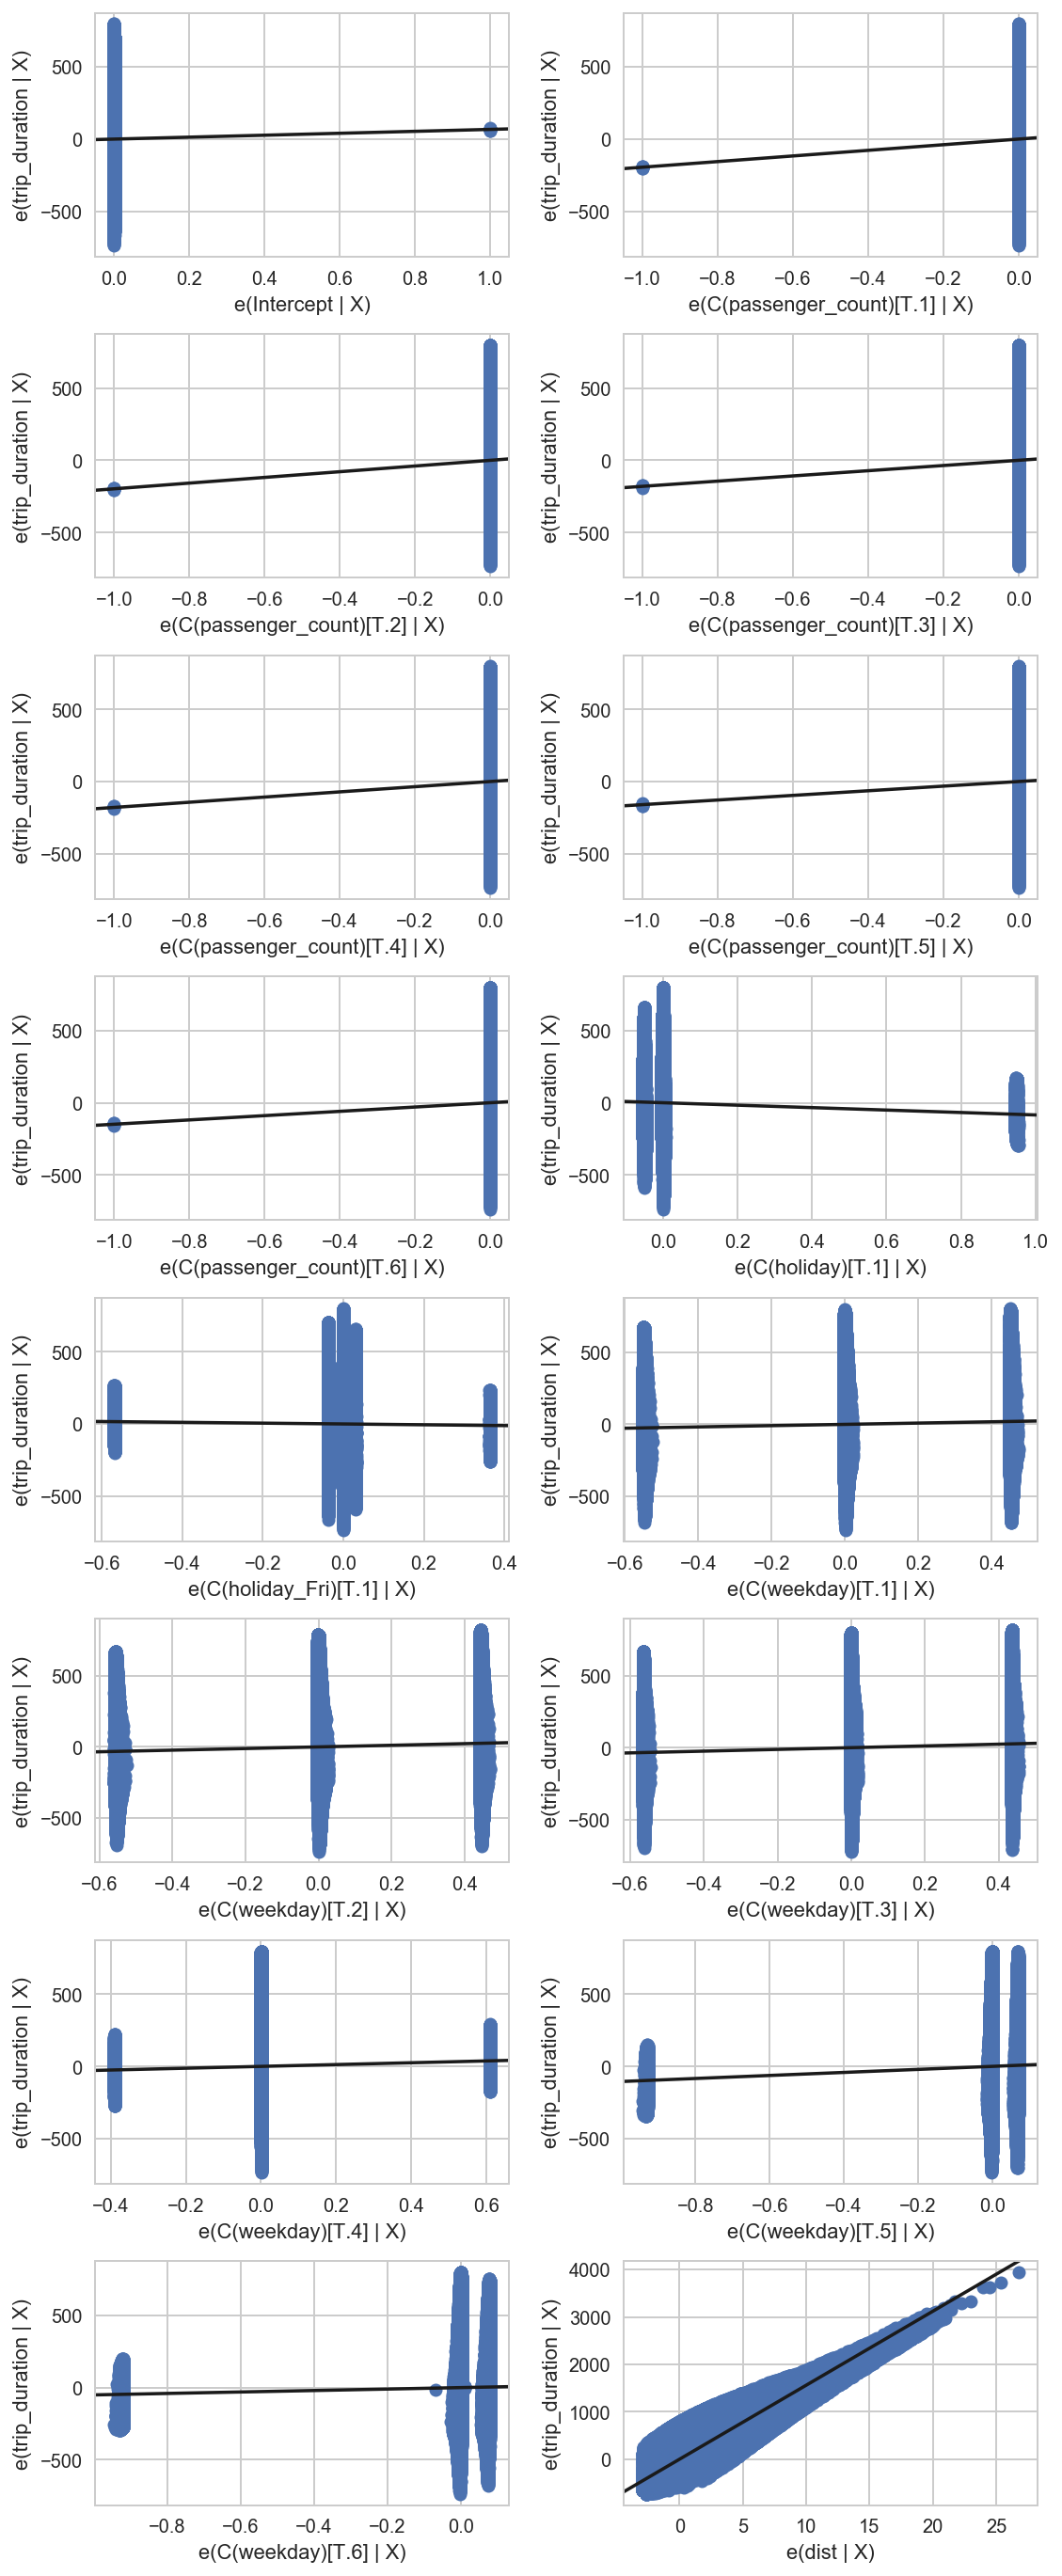

In [39]:
fig = plt.figure(figsize = (8, 20))
sm.graphics.plot_partregress_grid(result, fig=fig)
fig.suptitle("")
plt.show()

In [40]:
#np.log("trip_duration")
#test_9(index = 9)
features = 'dist + C(passenger_count) + C(holiday) + C(holiday_Fri) + C(weekday)'

model =  sm.OLS.from_formula("np.log(trip_duration) ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "np.log(trip_duration)")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.457
Model:                               OLS   Adj. R-squared:                  0.457
Method:                    Least Squares   F-statistic:                 7.048e+04
Date:                   Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                           17:07:45   Log-Likelihood:            -9.5315e+05
No. Observations:                1254926   AIC:                         1.906e+06
Df Residuals:                    1254910   BIC:                         1.907e+06
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.2683      0.183     12.405      0.000       1.910       2.627
C(passenger_count)[T.1]     3.4909      0.183     19.092      0.000       3.133       3.849
C(passenger_count)[T.2]     3.5119      0.183     19.206      0.000       3.154       3.870
C(passenger_count)[T.3]     3.4961      0.183     19.119      0.000       3.138       3.855
C(passenger_count)[T.4]     3.5173      0.183     19.232      0.000       3.159       3.876
C(passenger_count)[T.5]     3.4551      0.183     18.895      0.000       3.097       3.814
C(passenger_count)[T.6]     3.4391      0.183     18.807      0.000       3.081       3.798
C(holiday)[T.1]            -0.1040      0.005    -18.922      0.000      -0.115      -0.093
C(holiday_Fri)[T.1]        -0.0952      0.007    -13.410      0.000      -0.109      -0.081
C(weekday)[T.1]             0.0676      0.002     36.863      0.000       0.064       0.071
C(weekday)[T.2]             0.0853      0.002     46.773      0.000       0.082       0.089
C(weekday)[T.3]             0.0855      0.002     47.248      0.000       0.082       0.089
C(weekday)[T.4]             0.1523      0.007     22.210      0.000       0.139       0.166
C(weekday)[T.5]             0.1952      0.004     43.969      0.000       0.187       0.204
C(weekday)[T.6]             0.1052      0.004     23.591      0.000       0.096       0.114
dist                        0.2034      0.000   1020.582      0.000       0.203       0.204
==============================================================================
Omnibus:                   532093.213   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5200651.443
Skew:                          -1.782   Prob(JB):                         0.00
Kurtosis:                      12.314   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- trip_duration에 log 씌우지 말 것, passenger_count 중 7명짜리 제거

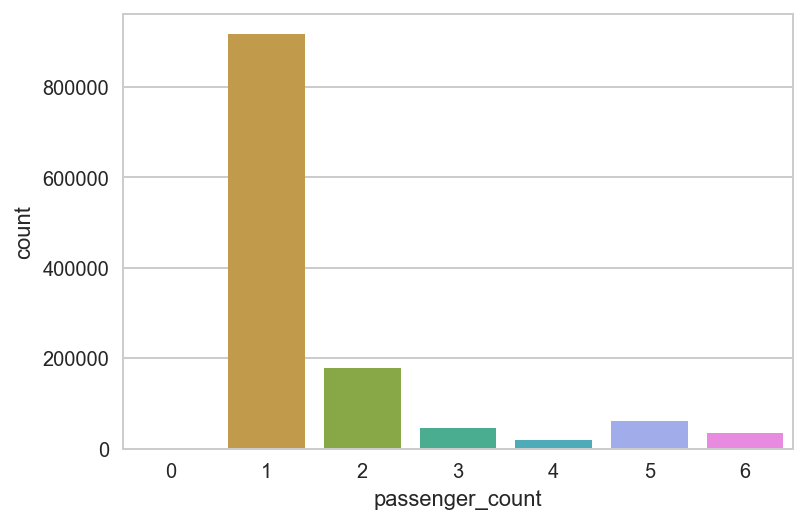

In [41]:
sns.countplot(taxi["passenger_count"])

In [42]:
taxi = taxi[taxi["passenger_count"] < 7 ]

In [43]:
#test_8로 복귀, passenger_count == 7 제거
#test_10(index = 10)
features = 'dist + C(passenger_count) + C(holiday) + C(holiday_Fri) + C(weekday)'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "passenger_count == 7 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 2.024e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:08:10   Log-Likelihood:            -8.6249e+06
No. Observations:             1254926   AIC:                         1.725e+07
Df Residuals:                 1254910   BIC:                         1.725e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  67.1798     82.616      0.813      0.416     -94.744     229.103
C(passenger_count)[T.1]   194.5586     82.614      2.355      0.019      32.638     356.479
C(passenger_count)[T.2]   197.2311     82.615      2.387      0.017      35.308     359.154
C(passenger_count)[T.3]   180.1940     82.620      2.181      0.029      18.261     342.127
C(passenger_count)[T.4]   179.3597     82.631      2.171      0.030      17.405     341.314
C(passenger_count)[T.5]   160.0452     82.619      1.937      0.053      -1.885     321.975
C(passenger_count)[T.6]   148.7644     82.623      1.801      0.072     -13.173     310.702
C(holiday)[T.1]           -84.5430      2.483    -34.045      0.000     -89.410     -79.676
C(holiday_Fri)[T.1]       -28.0267      3.207     -8.738      0.000     -34.313     -21.741
C(weekday)[T.1]            44.5864      0.829     53.773      0.000      42.961      46.212
C(weekday)[T.2]            57.0637      0.824     69.254      0.000      55.449      58.679
C(weekday)[T.3]            60.2540      0.818     73.661      0.000      58.651      61.857
C(weekday)[T.4]            62.9356      3.098     20.317      0.000      56.864      69.007
C(weekday)[T.5]           104.7001      2.006     52.193      0.000     100.768     108.632
C(weekday)[T.6]            50.6112      2.015     25.117      0.000      46.662      54.561
dist                      156.0354      0.090   1732.711      0.000     155.859     156.212
==============================================================================
Omnibus:                    68871.089   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80715.338
Skew:                           0.612   Prob(JB):                         0.00
Kurtosis:                       3.212   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 새로운 파일로 아래 실행 후, 교차검증 ㄱ ㄱ
> holiday, weekday 숫자 변경  
  holiday -> 1, 2로  
  weekday -> 1, 2, 3, 4, 5, 6, 7로  

In [44]:
def for_holiday(a) :
    if a == 0 :
        return 1
    else :
        return 2
    
def for_weekday(a) :
    if a == 0 :
        return 1
    elif a == 1:
        return 2
    elif a == 2:
        return 3
    elif a == 3:
        return 4
    elif a == 4:
        return 6
    elif a == 5:
        return 6
    elif a == 6:
        return 7
    
def for_holiday_Fri(a) :
    if a == 0 :
        return 1
    else :
        return 2

In [46]:
taxi["holiday"] = taxi["holiday"].apply(for_holiday)
taxi["weekday"] = taxi["weekday"].apply(for_weekday)
taxi["holiday_Fri"] = taxi["holiday_Fri"].apply(for_holiday_Fri)

In [66]:
#holiday, weekday, holiday_Fri에 0이 있어 변수가 모두 나오지 않는 현상 해결
#test_11(index = 11)
features = 'dist + C(passenger_count) + C(holiday) + C(holiday_Fri) + C(weekday)'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result,  "요일에 0을 치환")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 2.168e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:15:38   Log-Likelihood:            -8.6250e+06
No. Observations:             1254926   AIC:                         1.725e+07
Df Residuals:                 1254911   BIC:                         1.725e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  67.4223     82.625      0.816      0.414     -94.520     229.364
C(passenger_count)[T.1]   194.2667     82.623      2.351      0.019      32.328     356.205
C(passenger_count)[T.2]   196.9656     82.625      2.384      0.017      35.024     358.907
C(passenger_count)[T.3]   179.9142     82.630      2.177      0.029      17.963     341.866
C(passenger_count)[T.4]   179.0350     82.641      2.166      0.030      17.062     341.008
C(passenger_count)[T.5]   159.7214     82.628      1.933      0.053      -2.227     321.670
C(passenger_count)[T.6]   148.4603     82.632      1.797      0.072     -13.496     310.416
C(holiday)[T.2]           -44.6856      0.763    -58.594      0.000     -46.180     -43.191
C(holiday_Fri)[T.2]       -67.8796      2.169    -31.298      0.000     -72.130     -63.629
C(weekday)[T.2]            44.5877      0.829     53.769      0.000      42.962      46.213
C(weekday)[T.3]            57.0652      0.824     69.248      0.000      55.450      58.680
C(weekday)[T.4]            60.2547      0.818     73.653      0.000      58.651      61.858
C(weekday)[T.6]           102.7901      2.003     51.317      0.000      98.864     106.716
C(weekday)[T.7]            50.6016      2.015     25.109      0.000      46.652      54.551
dist                      156.0537      0.090   1732.845      0.000     155.877     156.230
==============================================================================
Omnibus:                    69314.366   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81315.080
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                       3.214   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-상수항이 높은 p-value를 가지는 것을 발견, 한번 지워보자

In [69]:
#상수항 제거
#test_12(index = 12)
features = 'dist + C(passenger_count) + C(holiday) + C(holiday_Fri) + C(weekday)'

model =  sm.OLS.from_formula("trip_duration ~ {} + 0".format(features), data = taxi)
result = model.fit()
storage(result,  "상수항 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 2.168e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:18:17   Log-Likelihood:            -8.6250e+06
No. Observations:             1254926   AIC:                         1.725e+07
Df Residuals:                 1254911   BIC:                         1.725e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(passenger_count)[0]    67.4223     82.625      0.816      0.414     -94.520     229.364
C(passenger_count)[1]   261.6891      0.668    391.460      0.000     260.379     262.999
C(passenger_count)[2]   264.3879      0.840    314.933      0.000     262.743     266.033
C(passenger_count)[3]   247.3365      1.257    196.836      0.000     244.874     249.799
C(passenger_count)[4]   246.4573      1.840    133.964      0.000     242.852     250.063
C(passenger_count)[5]   227.1437      1.130    200.997      0.000     224.929     229.359
C(passenger_count)[6]   215.8826      1.388    155.557      0.000     213.163     218.603
C(holiday)[T.2]         -44.6856      0.763    -58.594      0.000     -46.180     -43.191
C(holiday_Fri)[T.2]     -67.8796      2.169    -31.298      0.000     -72.130     -63.629
C(weekday)[T.2]          44.5877      0.829     53.769      0.000      42.962      46.213
C(weekday)[T.3]          57.0652      0.824     69.248      0.000      55.450      58.680
C(weekday)[T.4]          60.2547      0.818     73.653      0.000      58.651      61.858
C(weekday)[T.6]         102.7901      2.003     51.317      0.000      98.864     106.716
C(weekday)[T.7]          50.6016      2.015     25.109      0.000      46.652      54.551
dist                    156.0537      0.090   1732.845      0.000     155.877     156.230
==============================================================================
Omnibus:                    69314.366   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81315.080
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                       3.214   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 상수항 제거 이후, passenger_count가 0인놈이 상수항만큼의 p-value를 보여줌
- 이상하니 제거 

In [73]:
#passenger_count = 0 제거
taxi = taxi[taxi["passenger_count"] != 0]

In [74]:
#승객수 0 제거
#test_13(index = 13)
features = 'dist + C(passenger_count) + C(holiday) + C(holiday_Fri) + C(weekday)'

model =  sm.OLS.from_formula("trip_duration ~ {} + 0".format(features), data = taxi)
result = model.fit()
storage(result,  "승객수 0 제거")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 2.335e+05
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:21:24   Log-Likelihood:            -8.6250e+06
No. Observations:             1254918   AIC:                         1.725e+07
Df Residuals:                 1254904   BIC:                         1.725e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(passenger_count)[1]   261.6891      0.668    391.459      0.000     260.379     262.999
C(passenger_count)[2]   264.3879      0.840    314.932      0.000     262.743     266.033
C(passenger_count)[3]   247.3365      1.257    196.836      0.000     244.874     249.799
C(passenger_count)[4]   246.4573      1.840    133.964      0.000     242.852     250.063
C(passenger_count)[5]   227.1437      1.130    200.997      0.000     224.929     229.359
C(passenger_count)[6]   215.8826      1.388    155.557      0.000     213.163     218.603
C(holiday)[T.2]         -44.6856      0.763    -58.594      0.000     -46.180     -43.191
C(holiday_Fri)[T.2]     -67.8796      2.169    -31.298      0.000     -72.130     -63.629
C(weekday)[T.2]          44.5877      0.829     53.769      0.000      42.962      46.213
C(weekday)[T.3]          57.0652      0.824     69.247      0.000      55.450      58.680
C(weekday)[T.4]          60.2547      0.818     73.653      0.000      58.651      61.858
C(weekday)[T.6]         102.7902      2.003     51.317      0.000      98.864     106.716
C(weekday)[T.7]          50.6015      2.015     25.109      0.000      46.652      54.551
dist                    156.0537      0.090   1732.840      0.000     155.877     156.230
==============================================================================
Omnibus:                    69313.211   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81313.599
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                       3.213   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 조건수를 아주 낮춰줄 수 있게됨.
- 상수항은 필요 없는 것이 아닐까?

In [75]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.009,2.910824e+07,2.910838e+07,0.0,0.0,0.0,152000000.0,"id, pick date 제거"
1,0.610,2.166025e+07,2.166039e+07,0.0,0.0,0.0,247000000.0,outlier 1차 제거
2,0.665,1.945760e+07,1.945774e+07,0.0,0.0,0.0,300000000.0,outlier 2차 제거
3,0.653,1.950869e+07,1.950880e+07,0.0,0.0,0.0,1590000.0,위도 및 경도 모두 제거
4,0.653,1.950869e+07,1.950879e+07,0.0,0.0,0.0,333000.0,store_and_fwd_flag 제거
5,0.690,1.809245e+07,1.809255e+07,0.0,0.0,0.0,337000.0,outlier 3차 제거
6,0.682,1.812447e+07,1.812455e+07,0.0,0.0,0.0,21.3,"pick_time, drop_time 제거"
7,0.684,1.811391e+07,1.811411e+07,0.0,0.0,0.0,3130.0,Category
8,0.708,1.724976e+07,1.724995e+07,0.0,0.0,0.0,3830.0,outlier 4차 제거
9,0.457,1.906332e+06,1.906525e+06,0.0,0.0,0.0,3830.0,np.log(trip_duration)


In [ ]:
#outlier 5차 제거
taxi = erase_outlier_np(result = result, data = taxi, total_feature = total_features())